In [81]:
import pandas as pd
import rna_seq_functions as rna
import os
import pyensembl
import matplotlib.pyplot as plt
import seaborn as sns
import plot_formatters as fmt
import matplotlib as mpl
import json

In [8]:
abundance_df = pd.read_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/Ania_M_allAnia serial rerunserial_Ania_percent-engraftment_NO filter_080919_long.csv'
)

In [9]:
clone_mice = abundance_df[['code', 'mouse_id']].drop_duplicates()

In [82]:
rna_seq_replicates = ['AN6', 'AN7']
replicate = 'AN7'
tenx_dir = '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/experiments/bridged'
COLOR_PALETTES = json.load(open('lib/color_palettes.json', 'r'))

In [11]:
rna_data = rna.rna_seq_normalized_matrix_to_long(
    os.path.join(tenx_dir, replicate + '_bridged.csv')
)

In [13]:
mice_rna = rna_data.merge(
    clone_mice
)
mice_rna.head()

,code,CBC,gene_id,expression,mouse_id
0,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,AAACCTGCACATGACT,ENSMUSG00000033845,1.105283,M16
1,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,AAACCTGTCACAAACC,ENSMUSG00000033845,0.000000,M16
2,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,AAACGGGAGGCCATAG,ENSMUSG00000033845,0.000000,M16
3,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,AAAGATGAGAGTGAGA,ENSMUSG00000033845,0.000000,M16
4,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,AAAGATGGTGTGAAAT,ENSMUSG00000033845,0.000000,M16


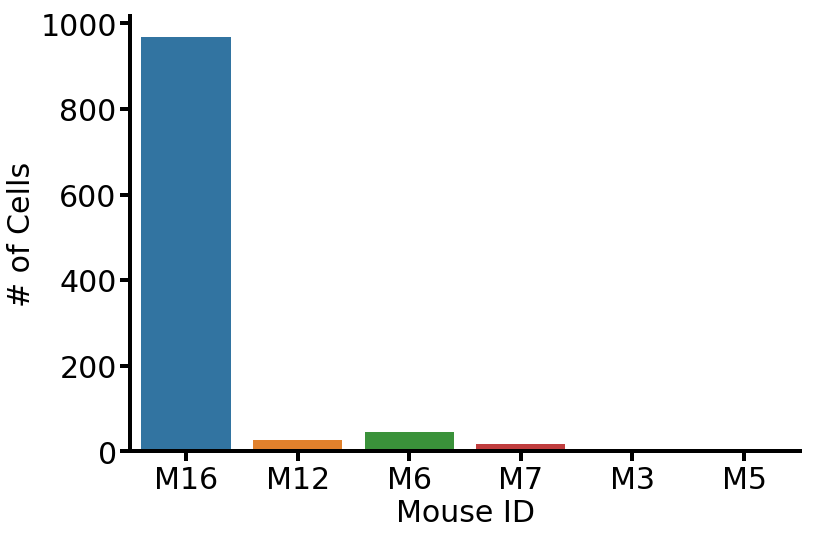

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_yscale('symlog')
unique_cells = mice_rna[['mouse_id', 'code', 'CBC']].drop_duplicates()
sns.countplot(x='mouse_id', data=unique_cells, ax=ax)
ax.set_xlabel('Mouse ID')
ax.set_ylabel('# of Cells')
sns.despine()
fmt.change_axis_linewidth(ax, 4)    

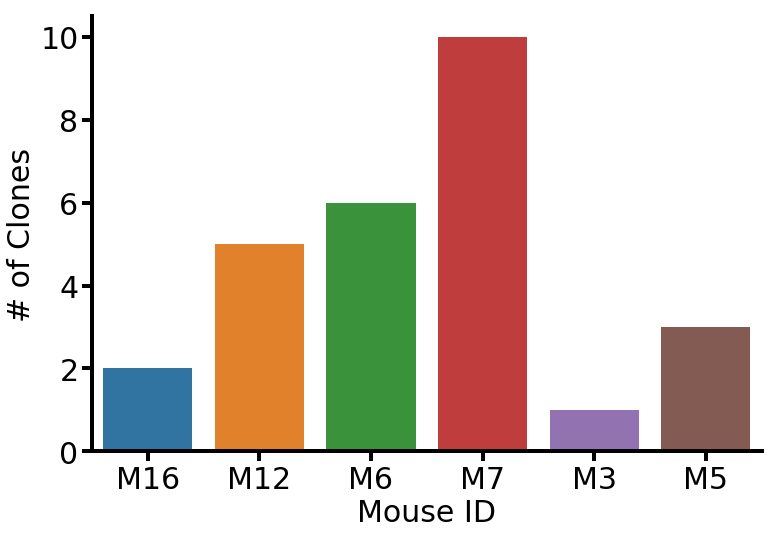

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_yscale('symlog')
unique_cells = mice_rna[['mouse_id', 'code']].drop_duplicates()
sns.countplot(x='mouse_id', data=unique_cells, ax=ax)
ax.set_xlabel('Mouse ID')
ax.set_ylabel('# of Clones')
sns.despine()
fmt.change_axis_linewidth(ax, 4)    

## Cells per mouse analysis

In [18]:
ensembl = pyensembl.EnsemblRelease(species='mus musculus')
ensembl.gene_by_id('ENSMUSG00000033845')

Gene(gene_id='ENSMUSG00000033845', gene_name='Mrpl15', biotype='protein_coding', contig='1', start=4773206, end=4785739, strand='-', genome='GRCm38')

In [39]:
Y_chrom_genes = ensembl.gene_ids(contig='Y')
X_chrom_genes = ensembl.gene_ids(contig='X')

In [40]:
expressed_in_y = mice_rna[
    (mice_rna.expression > 0) &\
    (mice_rna.gene_id.isin(Y_chrom_genes))
]
expressed_in_x = mice_rna[
    (mice_rna.expression > 0) &\
    (mice_rna.gene_id.isin(X_chrom_genes))
]
expressed_in_y.head()

,code,CBC,gene_id,expression,mouse_id
11069332,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,ACCGTAAGTCTACCTC,ENSMUSG00000056673,1.256107,M16
11069426,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,AGTTGGTAGCTCCTCT,ENSMUSG00000056673,1.619230,M16
11069485,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,CACAAACGTCCGTTAA,ENSMUSG00000056673,1.875589,M16
11069503,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,CACCAGGGTAGGACAC,ENSMUSG00000056673,0.972462,M16
11069545,CTTATGATCGATATTTGCGTCTGCGGCGTAGTCAGATCGGAAGAGC...,CATCGGGAGAAGGACA,ENSMUSG00000056673,1.991387,M16


In [45]:
cell_group_y_genes = pd.DataFrame(expressed_in_y.groupby(['mouse_id', 'code', 'CBC']).expression.sum()).reset_index()
cell_group_x_genes = pd.DataFrame(expressed_in_x.groupby(['mouse_id', 'code', 'CBC']).expression.sum()).reset_index()



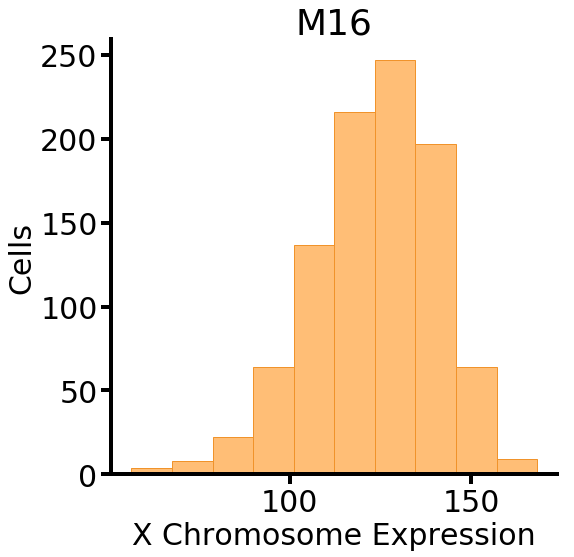

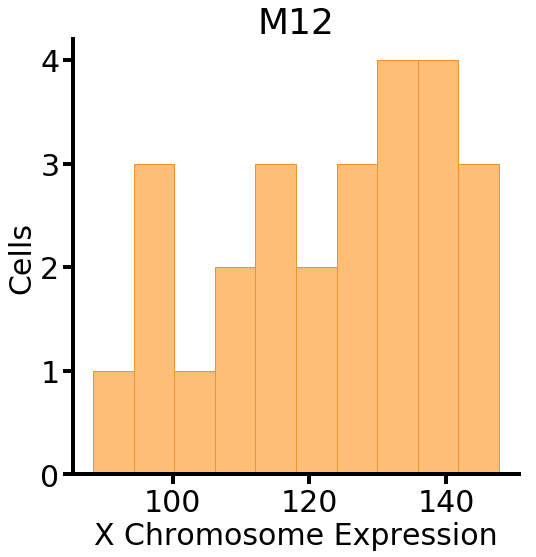

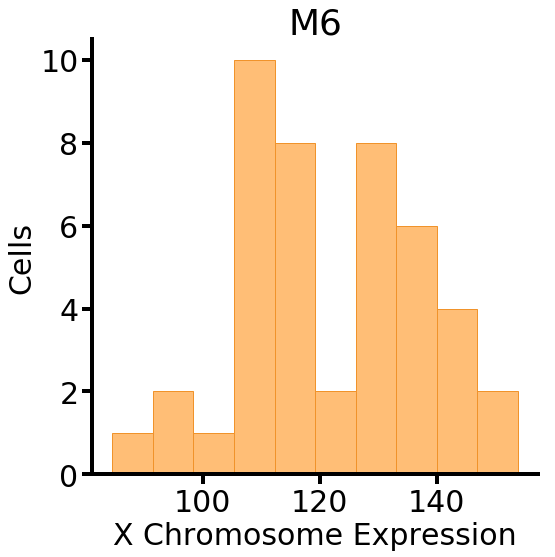

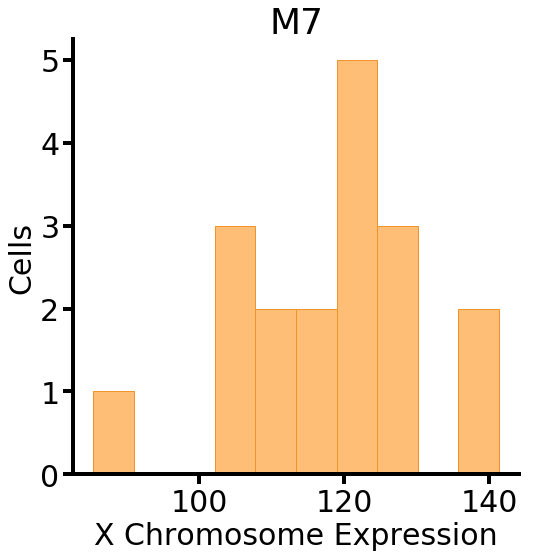

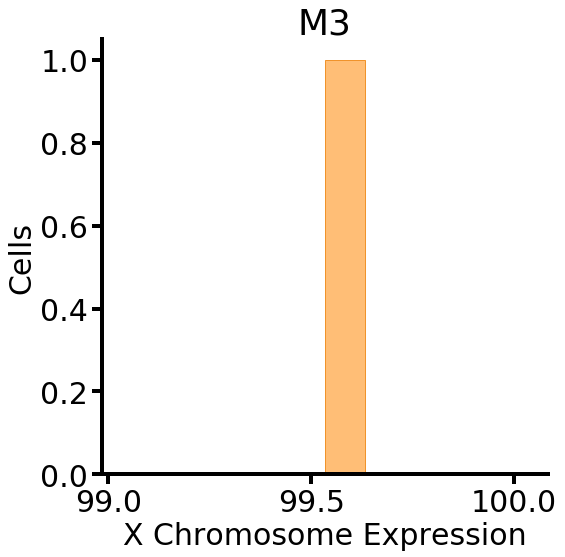

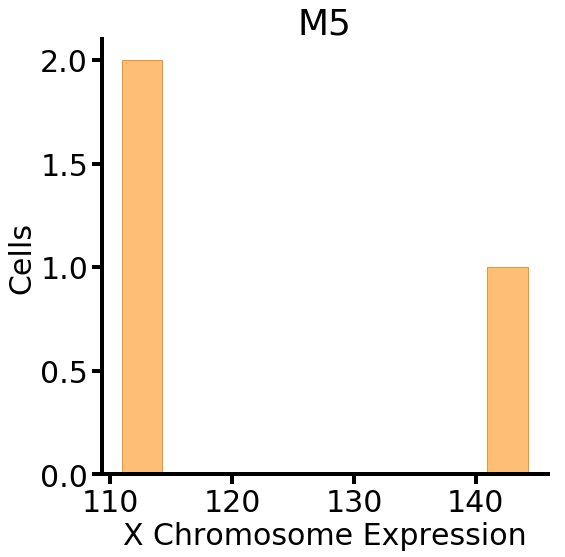

In [64]:
mpl.rcParams[
    'font.size'
] = 30
for mouse_id in mice_rna.mouse_id.unique():
    x_data = cell_group_x_genes[cell_group_x_genes.mouse_id == mouse_id]
    y_data = cell_group_y_genes[cell_group_y_genes.mouse_id == mouse_id]

    fig, ax = plt.subplots(figsize=(8,8))
    ax.hist(
        x_data.expression,
        facecolor='#ffbe76',
        edgecolor='#f0932b',
        linewidth=1,
        
    )
#    sns.distplot(
#        x_data.expression,
#        ax=ax,
#        label='X'
#    )
#    sns.distplot(
#        y_data.expression,
#        ax=ax,
#        label='Y'
#    )
    ax.set_xlabel('X Chromosome Expression')
    ax.set_ylabel('Cells')
    sns.despine()
    plt.title(mouse_id)
    fmt.change_axis_linewidth(ax, 4)    

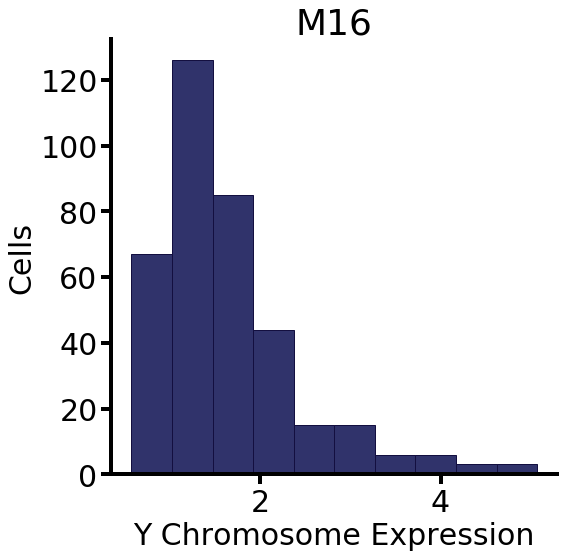

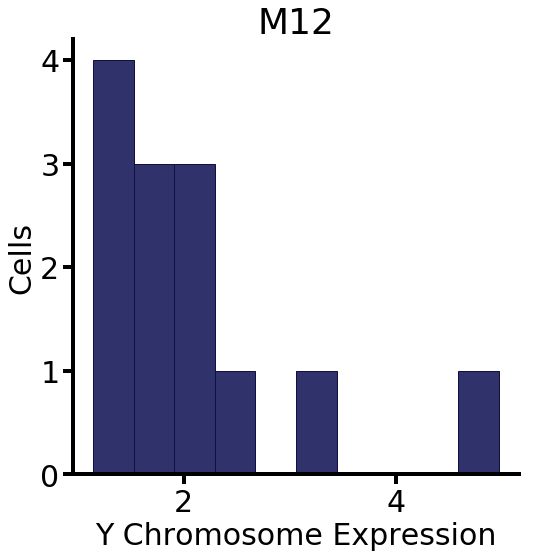

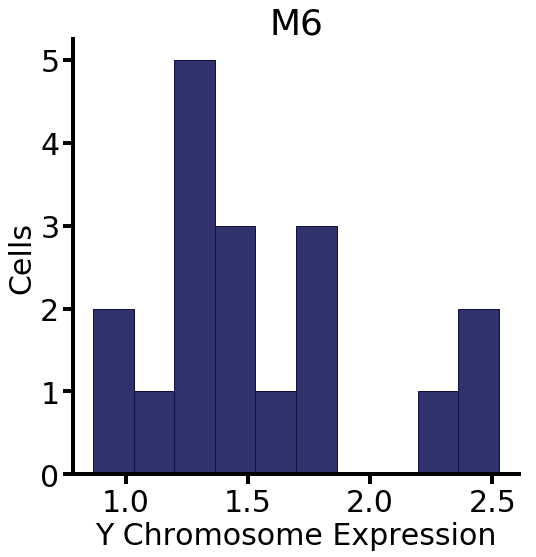

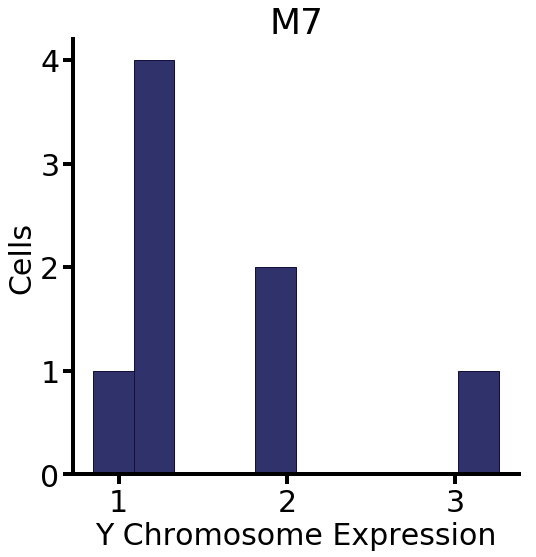

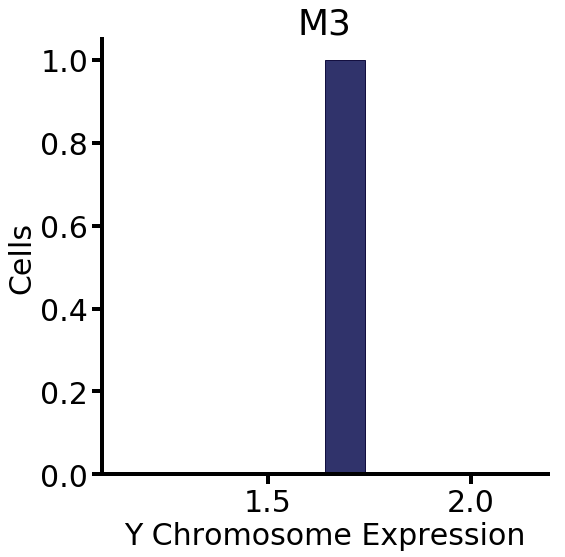

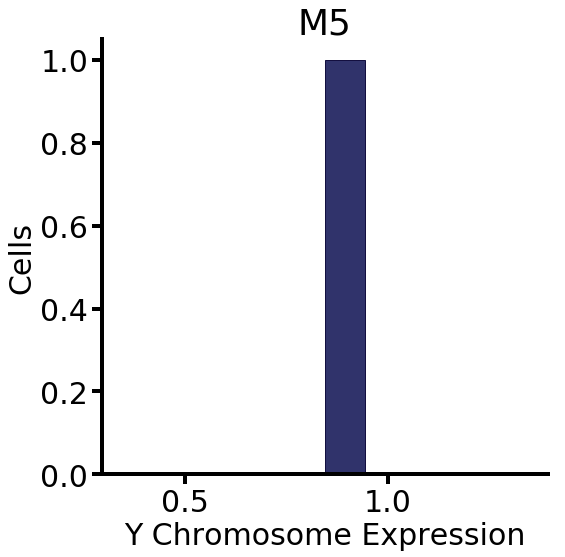

In [65]:
mpl.rcParams[
    'font.size'
] = 30
for mouse_id in mice_rna.mouse_id.unique():
    x_data = cell_group_x_genes[cell_group_x_genes.mouse_id == mouse_id]
    y_data = cell_group_y_genes[cell_group_y_genes.mouse_id == mouse_id]

    fig, ax = plt.subplots(figsize=(8,8))
    ax.hist(
        y_data.expression,
        facecolor='#30336b',
        edgecolor='#130f40',
        linewidth=1,
        
    )
#    sns.distplot(
#        x_data.expression,
#        ax=ax,
#        label='X'
#    )
#    sns.distplot(
#        y_data.expression,
#        ax=ax,
#        label='Y'
#    )
    ax.set_xlabel('Y Chromosome Expression')
    ax.set_ylabel('Cells')
    sns.despine()
    plt.title(mouse_id)
    fmt.change_axis_linewidth(ax, 4)    

## Individual Clones per mouse analysis

In [98]:
clone_group_all_genes = pd.DataFrame(mice_rna.groupby(['mouse_id', 'code']).expression.sum()).reset_index().rename(columns={'expression': 'total'})
clone_group_y_genes = pd.DataFrame(expressed_in_y.groupby(['mouse_id', 'code']).expression.sum()).reset_index().rename(columns={'expression': 'Y'})

norm_y_expression = clone_group_y_genes.merge(
    clone_group_all_genes,
    how='inner',
    validate='1:1'
).assign(
   norm_y_exp=lambda x: x.Y/x.total
)


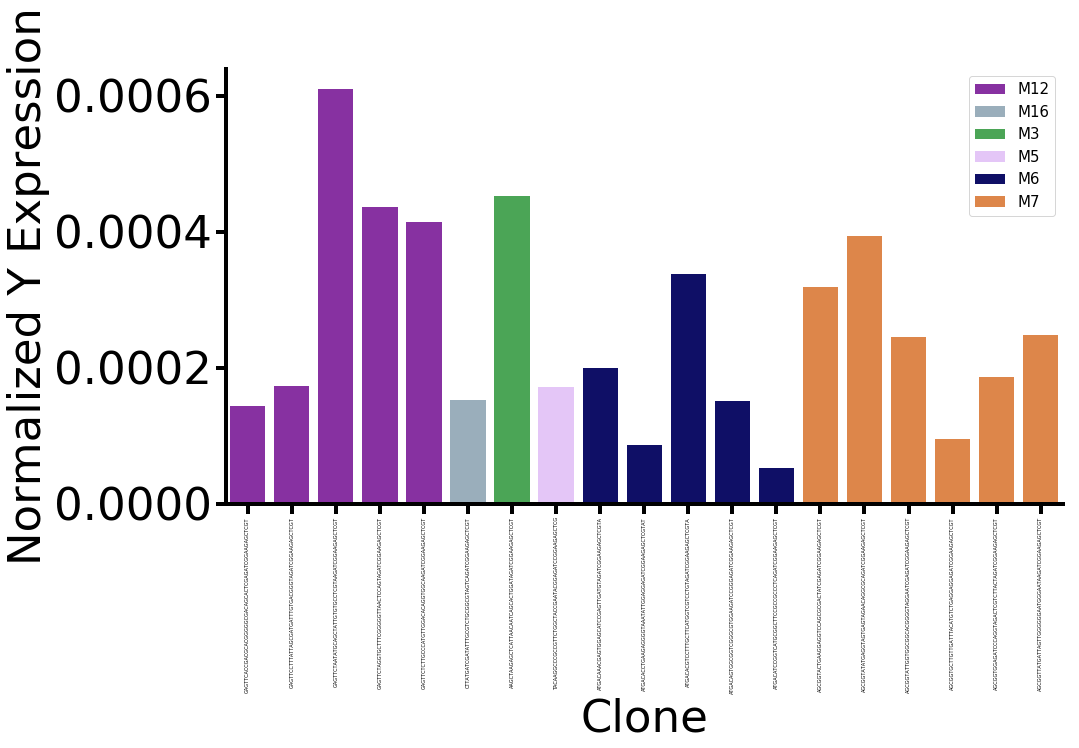

In [100]:
fig, ax = plt.subplots(figsize=(15, 8))
mpl.rcParams['font.size'] = 45
sns.barplot(
    x='code',
    y='norm_y_exp',
    data=norm_y_expression,
    hue='mouse_id',
    palette=COLOR_PALETTES['mouse_id'],
    dodge=False
)
ax.tick_params(axis='x', rotation=90, labelsize=5)
ax.legend(fontsize=15)
ax.set_ylabel('Normalized Y Expression')
ax.set_xlabel('Clone')
fmt.change_axis_linewidth(ax, 4)    
sns.despine()

In [105]:
cell_group_all_genes = pd.DataFrame(mice_rna.groupby(['mouse_id', 'code', 'CBC']).expression.sum()).reset_index().rename(columns={'expression': 'total'})
cell_group_y_genes = pd.DataFrame(expressed_in_y.groupby(['mouse_id', 'code', 'CBC']).expression.sum()).reset_index().rename(columns={'expression': 'Y'})

clone_avg_group_all_genes = pd.DataFrame(cell_group_all_genes.groupby(['mouse_id', 'code'])['total'].mean()).reset_index()
clone_avg_group_y_genes = pd.DataFrame(cell_group_y_genes.groupby(['mouse_id', 'code'])['Y'].mean()).reset_index()


norm_avg_y_expression = clone_avg_group_y_genes.merge(
    clone_avg_group_all_genes,
    how='inner',
    validate='1:1'
).assign(
   norm_avg_y_expression=lambda x: x.Y/x.total
)


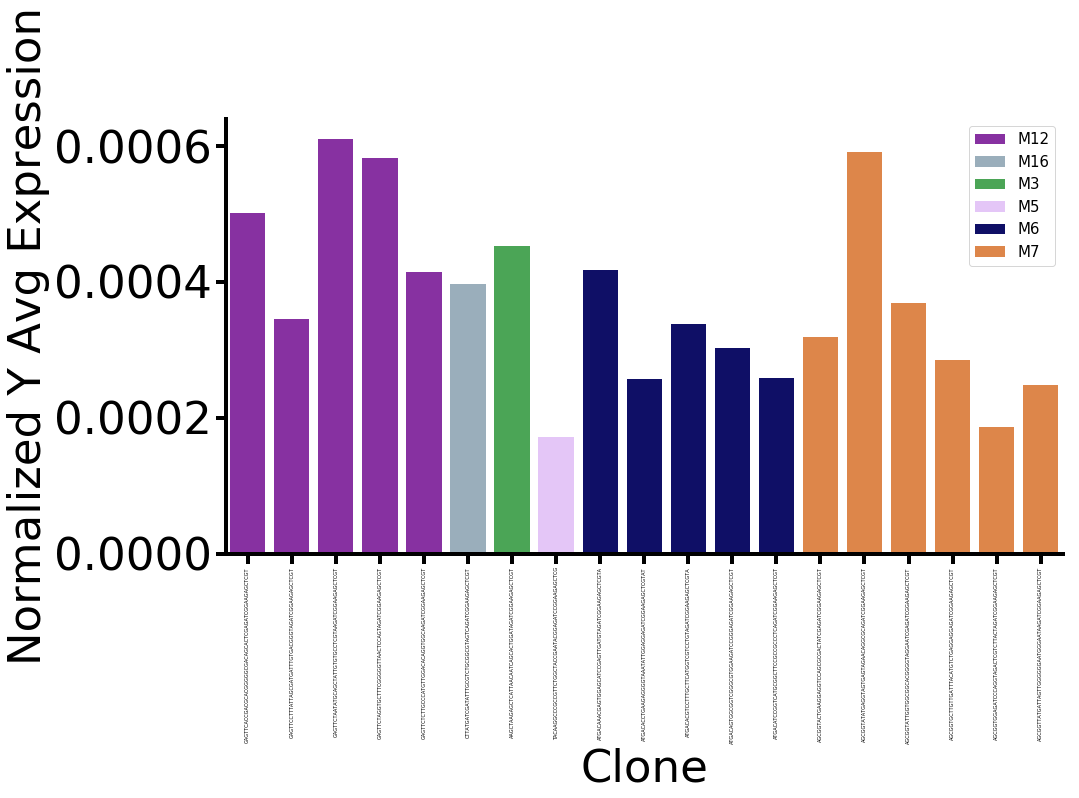

In [106]:
fig, ax = plt.subplots(figsize=(15, 8))
mpl.rcParams['font.size'] = 45
sns.barplot(
    x='code',
    y='norm_avg_y_expression',
    data=norm_avg_y_expression,
    hue='mouse_id',
    palette=COLOR_PALETTES['mouse_id'],
    dodge=False
)
ax.tick_params(axis='x', rotation=90, labelsize=5)
ax.legend(fontsize=15)
ax.set_ylabel('Normalized Y Avg Expression')
ax.set_xlabel('Clone')
fmt.change_axis_linewidth(ax, 4)    
sns.despine()

In [118]:
'","'.join(expressed_in_y.gene_id.unique())

'ENSMUSG00000056673","ENSMUSG00000069049","ENSMUSG00000068457","ENSMUSG00000069045","ENSMUSG00000096768'

In [109]:
len(Y_chrom_genes)

1569

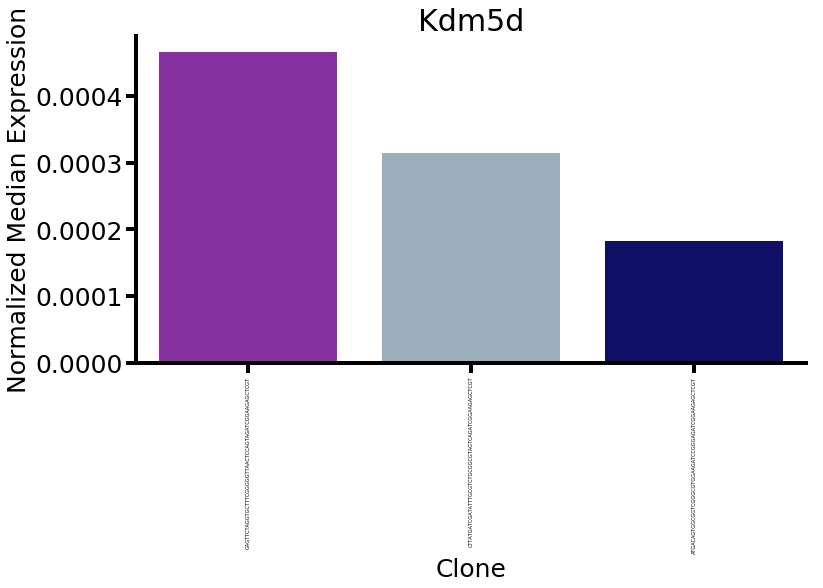

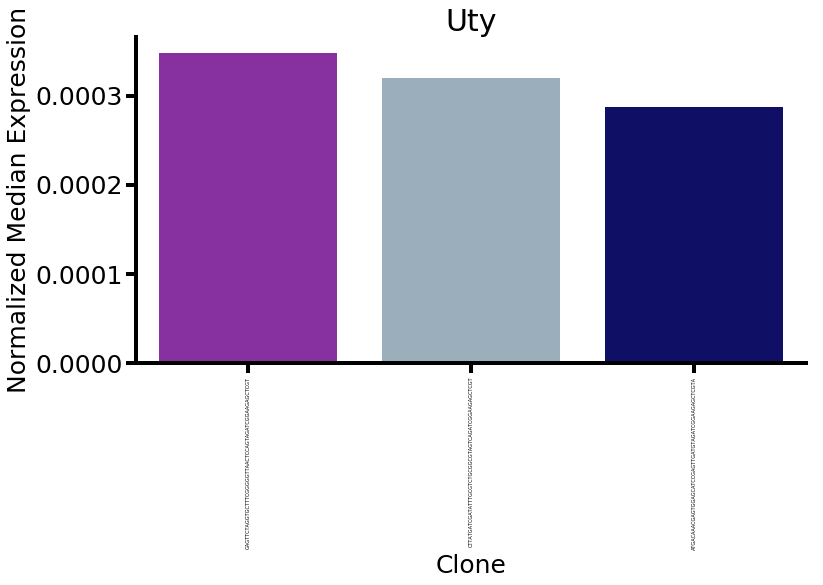

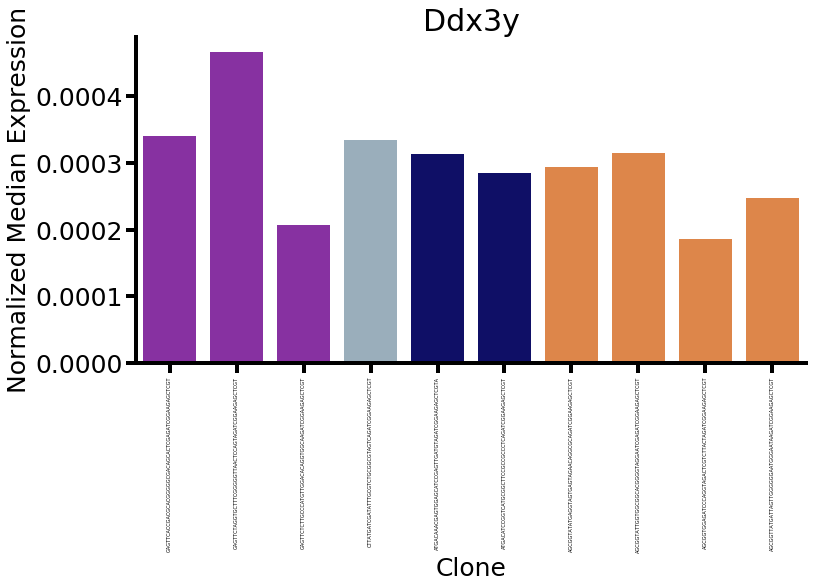

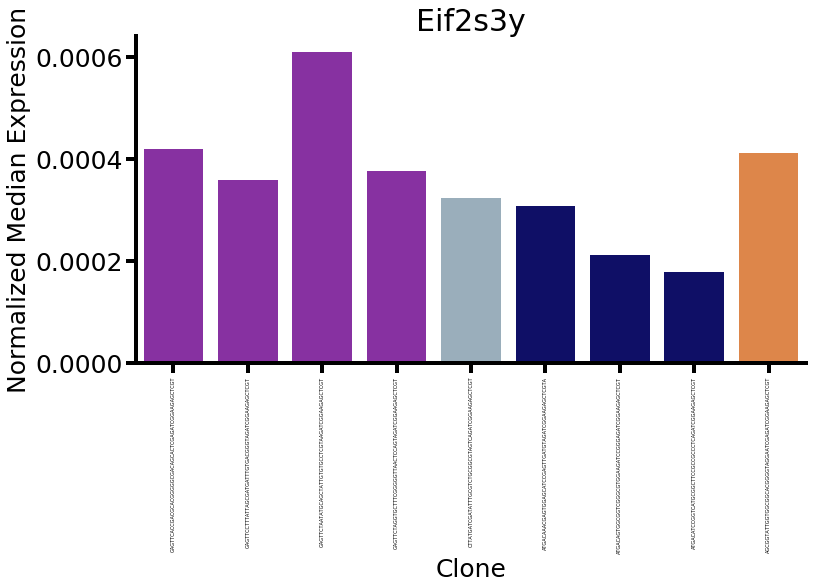

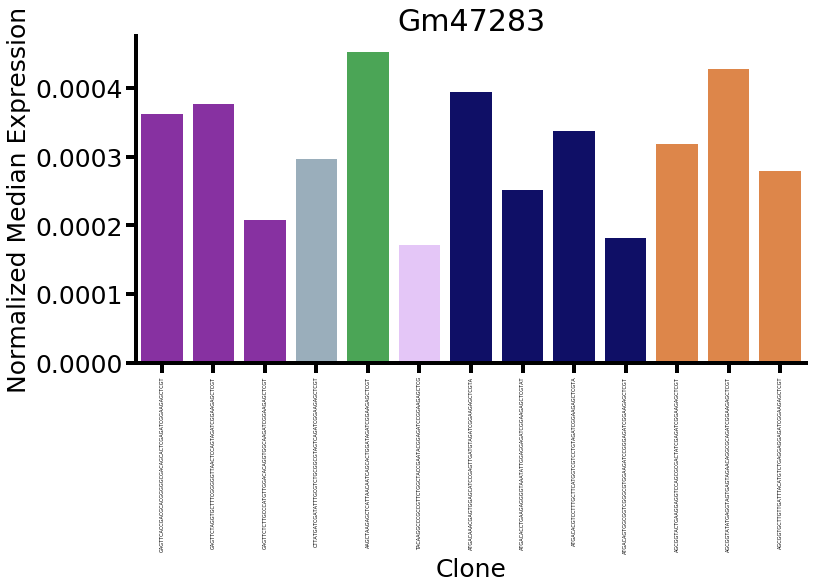

In [116]:
cell_group_all_genes = pd.DataFrame(mice_rna.groupby(['mouse_id', 'code', 'CBC']).expression.sum()).reset_index().rename(columns={'expression': 'total'})

for gene, g_df in expressed_in_y.groupby('gene_id'):
    cell_with_total = g_df.merge(
        cell_group_all_genes,
        how='inner',
        validate='1:1'
    ).assign(
        norm_gene_exp=lambda x: x.expression/x.total
    )
    

    norm_avg_y_gene_expression = pd.DataFrame(
        cell_with_total.groupby(
            ['mouse_id', 'code']
        ).norm_gene_exp.median()
    ).reset_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    mpl.rcParams['font.size'] = 25
    
    sns.barplot(
        x='code',
        y='norm_gene_exp',
        data=norm_avg_y_gene_expression,
        hue='mouse_id',
        palette=COLOR_PALETTES['mouse_id'],
        dodge=False
    )
    ax.tick_params(axis='x', rotation=90, labelsize=5)
    ax.legend(fontsize=15)
    ax.set_ylabel('Normalized Median Expression')
    ax.set_xlabel('Clone')
    fmt.change_axis_linewidth(ax, 4)    
    sns.despine()
    ax.legend().remove()
    plt.title(ensembl.gene_by_id(gene).gene_name)

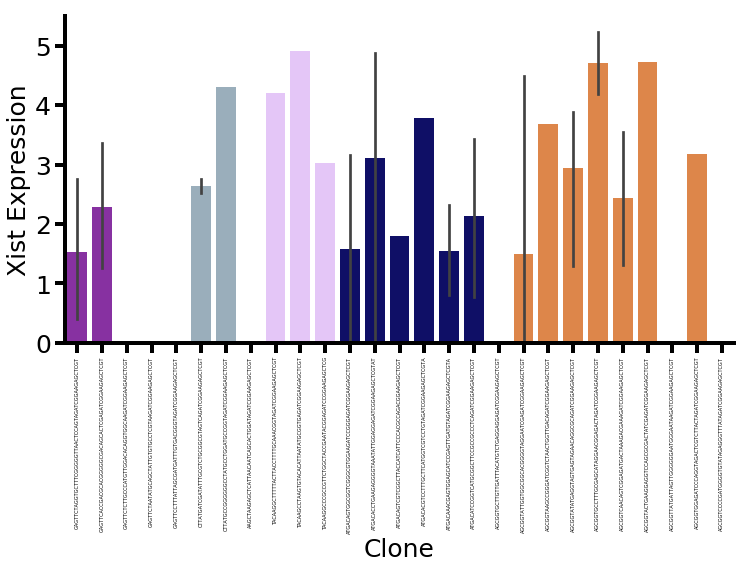

In [121]:
fig, ax = plt.subplots(figsize=(12, 6))
mpl.rcParams['font.size'] = 25
xist = mice_rna[mice_rna.gene_id == 'ENSMUSG00000086503'].sort_values(by='mouse_id')
sns.barplot(
    x='code',
    y='expression',
    data=xist,
    hue='mouse_id',
    palette=COLOR_PALETTES['mouse_id'],
    dodge=False
)
ax.tick_params(axis='x', rotation=90, labelsize=5)
ax.legend(fontsize=15)
ax.set_ylabel('Xist Expression')
ax.set_xlabel('Clone')
fmt.change_axis_linewidth(ax, 4)    
sns.despine()
ax.legend().remove()
